# 1.4 DEMO: Implementing the Autoencoder on Fashion-MNIST in Tensorflow

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import tensorflow as tf

from keras.datasets import mnist, fashion_mnist

# Not required, but a nice way to monitor progress
from tqdm import tqdm, tqdm_notebook

In [2]:
def import_fashion_mnist(flatten=True):
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train, x_test = x_train/255, x_test/255
    if flatten:
        x_train = x_train.reshape(-1, 28*28)
        x_test = x_test.reshape(-1, 28*28)
    return (x_train, y_train), (x_test, y_test)

def next_batch(num, data, labels):

    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = data[idx]
    labels_shuffle = labels[idx]
    labels_shuffle = np.asarray(labels_shuffle.reshape(len(labels_shuffle), 1))

    return data_shuffle, labels_shuffle

In [3]:
(x_train, y_train), (x_test, y_test) = import_fashion_mnist(flatten=True)

0


(<matplotlib.image.AxesImage at 0x1d028ec35f8>, None)

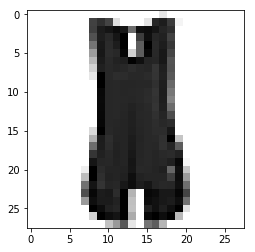

In [15]:
ix = 4
plt.imshow(x_train[ix].reshape(28, 28), cmap='gray_r'), print(y_train[ix])

<img src="Deep Autoencoder.png" width="50%" height="50%">

In [5]:
def build_autoencoder(input_image, encode_dim=10):
    """Function for building our autoencoder"""    
    # Our Encoder Takes the Input Image 
    # and learns representation at a lower dimension
    interim_encoding = tf.layers.dense(inputs=input_image,
                                       units=image_size / 2,
                                       activation=tf.nn.relu)
    
    # Multiple layers of encoders allow for deeper representations
    final_encoding = tf.layers.dense(interim_encoding,
                                      encode_dim,
                                      activation=tf.nn.relu)
    
    # We then 'undo' the representation symmetrically 
    interim_decoding = tf.layers.dense(final_encoding,
                                       image_size / 2,
                                       activation=tf.nn.relu)
    
    # Calculate loss by comparing logit with original image.
    decoded_image = tf.layers.dense(interim_decoding,
                             image_size,
                             activation=tf.nn.sigmoid,
                             name='decoded_image')
    
    # Average loss
    loss = tf.reduce_mean(tf.squared_difference(input_image, decoded_image))
    
    return loss, decoded_image, final_encoding

In [6]:
# Ensures that we build out graph from scratch
tf.reset_default_graph()
# Placeholder for our inputs
image_size = x_train.shape[1]
input_image = tf.placeholder(tf.float32,
                             shape=(None, image_size),
                             name='input_image')

# Build the model
loss, decoded, encoded = build_autoencoder(input_image, encode_dim=10)

# Initialize our optimizer
optim = tf.train.AdamOptimizer(1e-4).minimize(loss)

epochs = 50
batch_size = 128
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in tqdm_notebook(range(epochs)):
    epoch_loss = 0
    for batch in range(x_train.shape[0]//batch_size):
        x, y = next_batch(batch_size, x_train, y_train)
        feed = {input_image: x}
        batch_loss, _ = sess.run([loss, optim], feed_dict=feed)
        epoch_loss += batch_loss
    tqdm.write(f"Training Loss: {epoch_loss}")

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

Training Loss: 30.28383654728532
Training Loss: 14.02302373200655
Training Loss: 11.248081659898162
Training Loss: 10.163791812956333
Training Loss: 9.561662293970585
Training Loss: 9.168607791885734
Training Loss: 8.845759904012084
Training Loss: 8.632157143205404
Training Loss: 8.443416123278439
Training Loss: 8.322799572721124
Training Loss: 8.180832357145846
Training Loss: 8.06597344763577
Training Loss: 7.97075121384114
Training Loss: 7.824683024547994
Training Loss: 7.730016031302512
Training Loss: 7.6732197208330035
Training Loss: 7.599026337265968
Training Loss: 7.502313437871635
Training Loss: 7.477173324674368
Training Loss: 7.390322069637477
Training Loss: 7.376691367477179
Training Loss: 7.281380848027766
Training Loss: 7.2329314816743135
Training Loss: 7.22268976829946
Training Loss: 7.155859887599945
Training Loss: 7.137935172766447
Training Loss: 7.066427094861865
Training Loss: 7.079430161044002
Training Loss: 7.039946490898728
Training Loss: 7.045762890949845
Training 

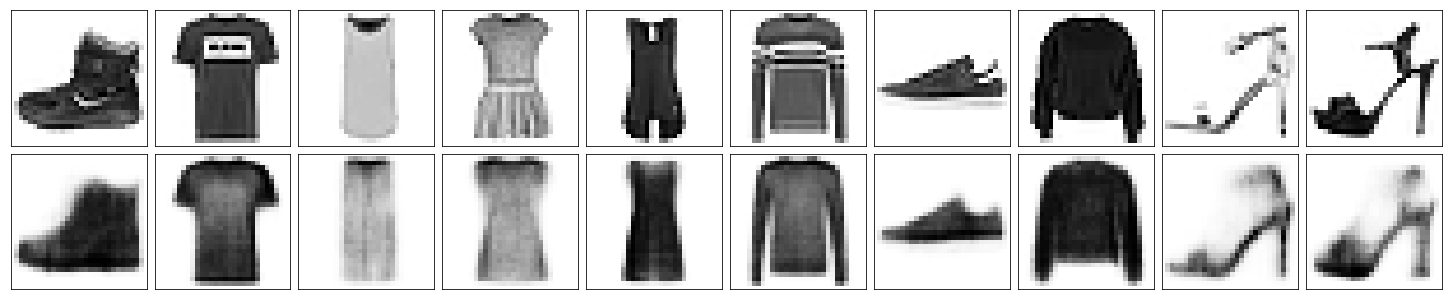

In [7]:
n_img = 10
fig, axes = plt.subplots(nrows=2, ncols=n_img, sharex=True, sharey=True, figsize=(20,4))
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={input_image: x_train})

for images, row in zip([x_train[:n_img], reconstructed[:n_img]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

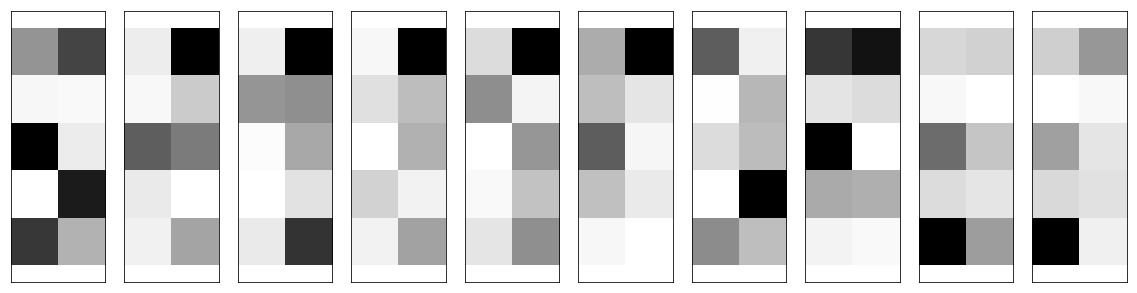

In [8]:
fix, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(20, 5))
for img, ax in zip(compressed[:n_img], axes):
    ax.imshow(img.reshape((5, 2)), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)